In [43]:
import pandas as pd

df = pd.read_csv('10 pipe dataset.csv')
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [44]:
df.shape

(12316, 32)

<Axes: xlabel='Accident_severity'>

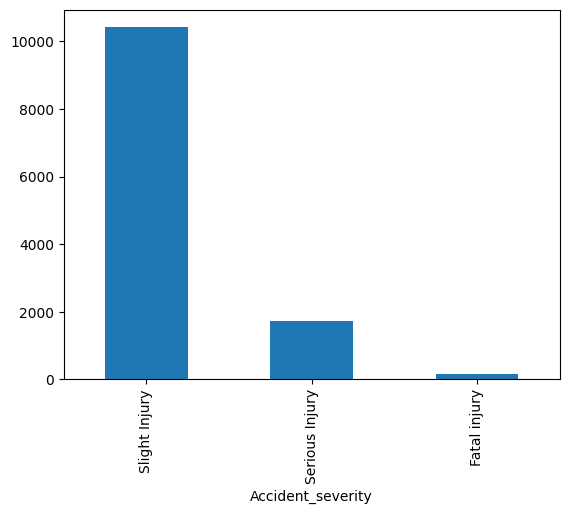

In [45]:
df['Accident_severity'].value_counts().plot(kind='bar')

<Axes: ylabel='Educational_level'>

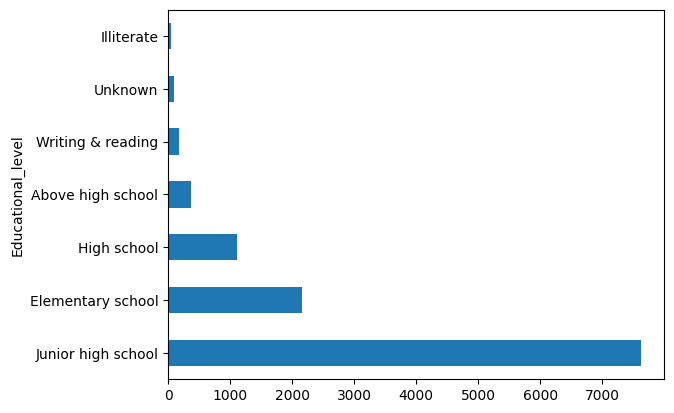

In [46]:
df['Educational_level'].value_counts().plot(kind='barh')

In [47]:
df['Time'] = pd.to_datetime(df['Time'])

C:\Users\HP\AppData\Local\Temp\ipykernel_16420\2145562215.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [48]:
df['hour_of_day'] = df['Time'].dt.hour

In [49]:
new_df = df.copy()
new_df.drop('Time',axis=1,inplace=True)

Encoder Target Column

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

new_df['Accident_severity'] = le.fit_transform(df['Accident_severity'])

In [51]:
new_df['Accident_severity'].value_counts()

Accident_severity
2    10415
1     1743
0      158
Name: count, dtype: int64

In [52]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


Balance Dataset

In [53]:
from imblearn.over_sampling import RandomOverSampler

x = new_df.drop(columns=["Accident_severity"])
y = new_df['Accident_severity']

oversample = RandomOverSampler(random_state=42)

x_resample,y_resample = oversample.fit_resample(x,y) 

In [54]:
y_resample.value_counts()

Accident_severity
2    10415
1    10415
0    10415
Name: count, dtype: int64

In [55]:
 from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size=0.2,random_state=42)

In [56]:
new_df.isnull().sum()

Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality        

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Define the strategies for each column
strategies = {
    3: 'most_frequent',   # Educational_level
    4: 'most_frequent',   # Vehicle_driver_relation
    5: 'most_frequent',   # Driving_experience
    6: 'most_frequent',   # Type_of_vehicle
    8: 'constant',        # Service_year_of_vehicle
    9: 'constant',        # Defect_of_vehicle
    10: 'most_frequent',  # Area_accident_occured
    11: 'most_frequent',  # Lanes_or_Medians
    12: 'most_frequent',  # Road_allignment
    13: 'most_frequent',  # Types_of_Junction
    14: 'most_frequent',  # Road_surface_type
    18: 'most_frequent',  # Type_of_collision
    21: 'most_frequent',  # Vehicle_movement
    26: 'most_frequent',  # Work_of_casuality
    27: 'most_frequent'   # Fitness_of_casuality
}

# Create a ColumnTransformer for data preprocessing
tf1 = ColumnTransformer([
    ('impute_educational_level', SimpleImputer(strategy=strategies[3]), [3]),
    ('impute_Vehicle_driver_relation', SimpleImputer(strategy=strategies[4]), [4]),
    ('impute_Driving_experience', SimpleImputer(strategy=strategies[5]), [5]),
    ('impute_Type_of_vehicle', SimpleImputer(strategy=strategies[6]), [6]),
    ('impute_Service_year_of_vehicle', SimpleImputer(strategy=strategies[8], fill_value='Unknown'), [8]),
    ('impute_Defect_of_vehicle', SimpleImputer(strategy=strategies[9], fill_value='Unknown'), [9]),
    ('impute_Area_accident_occured', SimpleImputer(strategy=strategies[10]), [10]),
    ('impute_Lanes_or_Medians', SimpleImputer(strategy=strategies[11]), [11]),
    ('impute_Road_allignment', SimpleImputer(strategy=strategies[12]), [12]),
    ('impute_Types_of_Junction', SimpleImputer(strategy=strategies[13]), [13]),
    ('impute_Road_surface_type', SimpleImputer(strategy=strategies[14]), [14]),
    ('impute_Type_of_collision', SimpleImputer(strategy=strategies[18]), [18]),
    ('impute_Vehicle_movement', SimpleImputer(strategy=strategies[21]), [21]),
    ('impute_Work_of_casuality', SimpleImputer(strategy=strategies[26]), [26]),
    ('impute_Fitness_of_casuality', SimpleImputer(strategy=strategies[27]), [27])
], remainder='passthrough')

In [63]:
from sklearn.preprocessing import OneHotEncoder

# List of column indices to encode
object_columns_indices = list(range(31))  # [0 to 30]

# Create the ColumnTransformer
tf2 = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), object_columns_indices)
    ],
    remainder='passthrough'
)

# Apply the transformation
x_train_encoded = tf2.fit_transform(x_train)
print(x_train_encoded.shape)


(24996, 258)


In [64]:
# feature seleciton method using chi2 for categorical output, categorical input
from sklearn.feature_selection import SelectKBest, chi2

tf4 = SelectKBest(chi2, k=50)

Model (Random Forest Classifier

In [65]:
# import the necessary liabrary
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score


tf5 = RandomForestClassifier()

Creat Pipeline

In [66]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('tf1', tf1),
    ('tf2', tf2),
    ('tf4', tf4),
    ('tf5',tf5)
])  


pipe.fit(x_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_educational_level',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [3]),
                                                 ('impute_Vehicle_driver_relation',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [4]),
                                                 ('impute_Driving_experience',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [5]),
                                                 ('impute_Type_of_vehicle',
                                                  SimpleImputer(strat...
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [27])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...])])),
                ('tf4',
                 SelectKBest(k=50,
                             score_func=<function chi2 at 0x000001C9B40DB060>)),
                ('tf5', RandomForestClassifier())])

In [69]:
from sklearn.metrics import accuracy_score

y_pred = pipe.predict(x_test)
accuracy_score(y_test,y_pred)


0.9222275564090254

In [71]:
y_pred = pipe.predict(x_test)
y_pred

array([1, 2, 2, ..., 0, 1, 2], shape=(6249,))

In [72]:
# Code here
pipe.named_steps

{'tf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_educational_level',
                                  SimpleImputer(strategy='most_frequent'), [3]),
                                 ('impute_Vehicle_driver_relation',
                                  SimpleImputer(strategy='most_frequent'), [4]),
                                 ('impute_Driving_experience',
                                  SimpleImputer(strategy='most_frequent'), [5]),
                                 ('impute_Type_of_vehicle',
                                  SimpleImputer(strategy='most_frequent'), [6...
                                 ('impute_Road_surface_type',
                                  SimpleImputer(strategy='most_frequent'),
                                  [14]),
                                 ('impute_Type_of_collision',
                                  SimpleImputer(strategy='most_frequent'),
                                  [18]),
                

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2085
           1       0.85      0.95      0.90      2100
           2       0.95      0.82      0.88      2064

    accuracy                           0.92      6249
   macro avg       0.93      0.92      0.92      6249
weighted avg       0.93      0.92      0.92      6249



In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2085,    0,    0],
       [  22, 1989,   89],
       [  29,  346, 1689]])

In [75]:
import pickle 
pickle.dump(pipe,open("10 pipe.pkl",'wb'))

In [78]:
import numpy as np

def pred(Day_of_week, Age_band_of_driver, Sex_of_driver, Educational_level, Vehicle_driver_relation,
         Driving_experience, Type_of_vehicle, Owner_of_vehicle, Service_year_of_vehicle,
         Defect_of_vehicle, Area_accident_occured, Lanes_or_Medians, Road_allignment,
         Types_of_Junction, Road_surface_type, Road_surface_conditions, Light_conditions,
         Weather_conditions, Type_of_collision, Number_of_vehicles_involved,
         Number_of_casualties, Vehicle_movement, Casualty_class, Sex_of_casualty,
         Age_band_of_casualty, Casualty_severity, Work_of_casuality, Fitness_of_casuality,
         Pedestrian_movement, Cause_of_accident, Hour_of_Day):
    
    # Your prediction code here
    features = np.array([[Day_of_week, Age_band_of_driver, Sex_of_driver, Educational_level, Vehicle_driver_relation,
         Driving_experience, Type_of_vehicle, Owner_of_vehicle, Service_year_of_vehicle,
         Defect_of_vehicle, Area_accident_occured, Lanes_or_Medians, Road_allignment,
         Types_of_Junction, Road_surface_type, Road_surface_conditions, Light_conditions,
         Weather_conditions, Type_of_collision, Number_of_vehicles_involved,
         Number_of_casualties, Vehicle_movement, Casualty_class, Sex_of_casualty,
         Age_band_of_casualty, Casualty_severity, Work_of_casuality, Fitness_of_casuality,
         Pedestrian_movement, Cause_of_accident, Hour_of_Day]])
    
    results = pipe.predict(features)
    return results


In [79]:
predicted_class = pred(Day_of_week="Thursday", 
                                Age_band_of_driver='31-50',
                                Sex_of_driver='Male',
                                Educational_level='Junior high school',
                                Vehicle_driver_relation='Owner',
                                Driving_experience=None,
                                Type_of_vehicle='Long lorry',
                                Owner_of_vehicle='Owner',
                                Service_year_of_vehicle='Unknown',
                                Defect_of_vehicle=None,
                                Area_accident_occured='Other',
                                Lanes_or_Medians='Two-way (divided with solid lines road marking)',
                                Road_allignment='Tangent road with flat terrain',
                                Types_of_Junction=None,
                                Road_surface_type=None,
                                Road_surface_conditions='Dry',
                                Light_conditions='Daylight',
                                Weather_conditions='Normal',
                                Type_of_collision='Collision with animals',
                                Number_of_vehicles_involved=2,
                                Number_of_casualties=1,
                                Vehicle_movement='Going straight',
                                Casualty_class='Driver or rider',
                                Sex_of_casualty='Male',
                                Age_band_of_casualty='18-30',
                                Casualty_severity=3,
                                Work_of_casuality='Driver',
                                Fitness_of_casuality='Normal',
                                Pedestrian_movement='Not a Pedestrian',
                                Cause_of_accident='Changing lane to the left',
                                Hour_of_Day=12)

if predicted_class[0] == 2:
    print("Slight Injury.....")
elif predicted_class[0] == 1:
    print("Serious Injury")
else:
    print("Fatal Injury")

Serious Injury


C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does 

In [80]:
# test 2
predicted_class = pred(Day_of_week="Friday", 
                       Age_band_of_driver='31-50',
                       Sex_of_driver='Male',
                       Educational_level='Elementary school',
                       Vehicle_driver_relation='Employee',
                       Driving_experience='1-2yr',
                       Type_of_vehicle='Lorry (41?100Q)',
                       Owner_of_vehicle='Owner',
                       Service_year_of_vehicle=None,
                       Defect_of_vehicle='No defect',
                       Area_accident_occured='Office areas',
                       Lanes_or_Medians='Two-way (divided with broken lines road marking)',
                       Road_allignment='Tangent road with flat terrain',
                       Types_of_Junction='Y Shape',
                       Road_surface_type='Asphalt roads',
                       Road_surface_conditions='Dry',
                       Light_conditions='Daylight',
                       Weather_conditions='Normal',
                       Type_of_collision='Vehicle with vehicle collision',
                       Number_of_vehicles_involved=2,
                       Number_of_casualties=2,
                       Vehicle_movement='Going straight',
                       Casualty_class='na',
                       Sex_of_casualty='na',
                       Age_band_of_casualty='na',
                       Casualty_severity='na',
                       Work_of_casuality='Driver',
                       Fitness_of_casuality='Normal',
                       Pedestrian_movement='Not a Pedestrian',
                       Cause_of_accident='Changing lane to the left',
                       Hour_of_Day=1)

if predicted_class[0] == 2:
    print("Slight Injury")
elif predicted_class[0] == 1:
    print("Serious Injury")
else:
    print("Fatal Injury")

Slight Injury


C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does 